In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df1=pd.read_csv(r"C:\Users\alasy\Downloads\movie_data\movies.csv")
df2=pd.read_csv(r"C:\Users\alasy\Downloads\movie_data\ratings.csv")
df3=pd.read_csv(r"C:\Users\alasy\Downloads\movie_data\tags.csv")
df4=pd.read_csv(r"C:\Users\alasy\Downloads\movie_data\links.csv")

In [102]:
df1.shape

(9742, 3)

In [103]:
df2.shape

(100836, 4)

In [104]:
len(set(df2['userId'].tolist()))

610

In [106]:
df1.merge(df2,on='movieId').groupby(['movieId','title'])['rating'].count()

movieId  title                                    
1        Toy Story (1995)                             215
2        Jumanji (1995)                               110
3        Grumpier Old Men (1995)                       52
4        Waiting to Exhale (1995)                       7
5        Father of the Bride Part II (1995)            49
                                                     ... 
193581   Black Butler: Book of the Atlantic (2017)      1
193583   No Game No Life: Zero (2017)                   1
193585   Flint (2017)                                   1
193587   Bungo Stray Dogs: Dead Apple (2018)            1
193609   Andrew Dice Clay: Dice Rules (1991)            1
Name: rating, Length: 9724, dtype: int64

In [108]:
shy= df2.groupby('movieId')['rating'].count()

In [109]:
shy.sort_values(ascending=False)


movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [110]:
df1.set_index('movieId').loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [111]:
df1.reset_index()

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9737,9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,9739,193585,Flint (2017),Drama
9740,9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [112]:
df1.set_index('title').loc["Matrix, The (1999)"]

movieId                      2571
genres     Action|Sci-Fi|Thriller
Name: Matrix, The (1999), dtype: object

In [113]:
df3.set_index('movieId').loc[2571]

,userId,tag,timestamp
movieId,,,
2571,424,martial arts,1457842912
2571,424,sci-fi,1457842899
2571,474,alternate universe,1137204991
2571,537,philosophy,1424141098
2571,537,post apocalyptic,1424141101


In [114]:
df1.set_index('title').loc['Terminator 2: Judgment Day (1991)']

movieId              589
genres     Action|Sci-Fi
Name: Terminator 2: Judgment Day (1991), dtype: object

In [115]:
df2[df2['movieId']==589]['rating'].mean()

3.970982142857143

<AxesSubplot:ylabel='Density'>

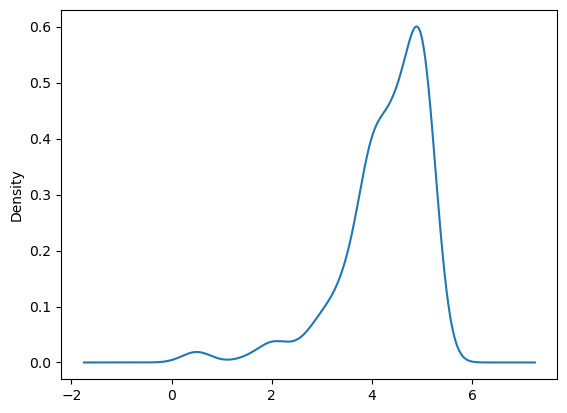

In [116]:
df2[df2['movieId']==2959]['rating'].plot(kind='kde')

In [117]:
FILE = df2.groupby('movieId').agg({'rating':['count','mean']}).reset_index()

In [119]:
newfile = pd.merge(df1,FILE,on='movieId')

C:\Users\alasy\AppData\Local\Temp\ipykernel_35036\3504109893.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  newfile = pd.merge(df1,FILE,on='movieId')
C:\Users\alasy\AppData\Local\Temp\ipykernel_35036\3504109893.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  newfile = pd.merge(df1,FILE,on='movieId')


In [120]:
newfile.columns=['movieId','title','genres','count','mean']

In [121]:
newfile[newfile['count']>50].sort_values(by= 'count',ascending=False).iloc[0:5]

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [122]:
newdata = newfile[newfile['count']>50]

In [123]:
newdata[newdata['genres'].str.contains('Sci-Fi')].sort_values(by='count',ascending=False).iloc[2]

movieId                                 480
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
count                                   238
mean                                   3.75
Name: 418, dtype: object

In [124]:
import requests
import numpy as np
from bs4 import BeautifulSoup

In [125]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [128]:
imdb = pd.merge(newdata,df4,on='movieId')

In [ ]:
imdb['imdbRatings'] = imdb['imdbId'].apply(scrapper)

In [ ]:
imdb

In [ ]:
imdb[imdb['imdbRatings']==imdb['imdbRatings'].max()]


In [ ]:
imdbSci_fi = imdb[imdb['genres'].str.contains('Sci-Fi')]

In [ ]:
imdbSci_fi[imdbSci_fi['imdbRatings']==imdbSci_fi['imdbRatings'].max()]